In [2]:
Employee = {
    'first': ['Venkat', 'Ram', 'hari'], 
    'last': ['ram', 'Mohan', 'Mishra'], 
    'email': ['venk10@gmail.com', 'ramgives@email.com', 'hari9845@email.com']
}

In [3]:
Employee

{'first': ['Venkat', 'Ram', 'hari'],
 'last': ['ram', 'Mohan', 'Mishra'],
 'email': ['venk10@gmail.com', 'ramgives@email.com', 'hari9845@email.com']}

In [6]:
import pandas as pd
df = pd.DataFrame(Employee)
df

,first,last,email
0,Venkat,ram,venk10@gmail.com
1,Ram,Mohan,ramgives@email.com
2,hari,Mishra,hari9845@email.com


In [12]:
#string concat
df['full_name'] = df['first'] + ' ' + df['last']
df

,first,last,email,full_name
0,Venkat,ram,venk10@gmail.com,Venkat ram
1,Ram,Mohan,ramgives@email.com,Ram Mohan
2,hari,Mishra,hari9845@email.com,hari Mishra


In [14]:
df.drop(columns=['first', 'last'], inplace=True)

KeyError: "['first' 'last'] not found in axis"

In [15]:
df

,email,full_name
0,venk10@gmail.com,Venkat ram
1,ramgives@email.com,Ram Mohan
2,hari9845@email.com,hari Mishra


In [16]:
df['full_name'].str.split(' ', expand=True)

,0,1
0,Venkat,ram
1,Ram,Mohan
2,hari,Mishra


In [17]:
df[['first', 'last']] = df['full_name'].str.split(' ', expand=True)

In [18]:
df

,email,full_name,first,last
0,venk10@gmail.com,Venkat ram,Venkat,ram
1,ramgives@email.com,Ram Mohan,Ram,Mohan
2,hari9845@email.com,hari Mishra,hari,Mishra


In [19]:
df.append({'first': 'Gayu'}, ignore_index=True)

,email,full_name,first,last
0,venk10@gmail.com,Venkat ram,Venkat,ram
1,ramgives@email.com,Ram Mohan,Ram,Mohan
2,hari9845@email.com,hari Mishra,hari,Mishra
3,NaN,NaN,Gayu,NaN


In [21]:
#Append 2 dataframes
people = {
    'first': ['Tony', 'Steve'], 
    'last': ['Stark', 'Rogers'], 
    'email': ['IronMan@avenge.com', 'Cap@avenge.com']
}
df2 = pd.DataFrame(people)
df2

,first,last,email
0,Tony,Stark,IronMan@avenge.com
1,Steve,Rogers,Cap@avenge.com


In [22]:
df.append(df2, ignore_index=True, sort=False)

,email,full_name,first,last
0,venk10@gmail.com,Venkat ram,Venkat,ram
1,ramgives@email.com,Ram Mohan,Ram,Mohan
2,hari9845@email.com,hari Mishra,hari,Mishra
3,IronMan@avenge.com,NaN,Tony,Stark
4,Cap@avenge.com,NaN,Steve,Rogers


In [23]:
df['email'].unique()

array(['venk10@gmail.com', 'ramgives@email.com', 'hari9845@email.com'],
      dtype=object)

In [34]:
import pandas as pd


# Apply a lambda function to create a new column
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('C:/Users/ABIRAMI/OneDrive/Documents/2023-job_search/GIT-Repos/cleaning_data_dataset.txt', parse_dates=['Date'], date_parser=d_parser)

print(df)


                  Date  Symbol    Open    High     Low   Close       Volume
0  2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71   1940673.93
1  2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94   7579741.09
2  2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51   4898735.81
3  2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47   2753450.92
4  2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08   4461424.71
5  2020-03-13 15:00:00  ETHUSD  128.39  128.90  116.06  124.85   7378976.00
6  2020-03-13 14:00:00  ETHUSD  134.03  137.90  125.50  128.39   3733916.89
7  2020-03-13 13:00:00  ETHUSD  131.35  140.95  128.99  134.03   9582732.93
8  2020-03-13 12:00:00  ETHUSD  128.93  134.60  126.95  131.35   3906590.52
9  2020-03-13 11:00:00  ETHUSD  132.60  133.17  126.01  128.93   3311080.29
10 2020-03-13 10:00:00  ETHUSD  133.80  134.99  128.90  132.60   3483436.48
11 2020-03-13 09:00:00  ETHUSD  127.12  136.53  126.62  133.80   2767584.44
12 2020-03-1

<ipython-input-34-eff71eb8a5d7>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')


In [36]:
df.loc[25, 'Date'].day_name()

'Thursday'

In [37]:
df['Date'].dt.day_name()

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
5       Friday
6       Friday
7       Friday
8       Friday
9       Friday
10      Friday
11      Friday
12      Friday
13      Friday
14      Friday
15      Friday
16      Friday
17      Friday
18      Friday
19      Friday
20      Friday
21    Thursday
22    Thursday
23    Thursday
24    Thursday
25    Thursday
Name: Date, dtype: object

In [38]:
df['Date'].max() - df['Date'].min()

Timedelta('1 days 01:00:00')

In [39]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume


In [40]:
df.set_index('Date', inplace=True)

In [41]:
df['2020']

<ipython-input-41-348d00a3c84f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020']


,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52


In [42]:
df['2020-03-13 20:00:00':'2020-03-13 10:00:00']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52


In [44]:
highs = df['High'].resample('D').max()
highs['2020-03-13']

148.0

In [45]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

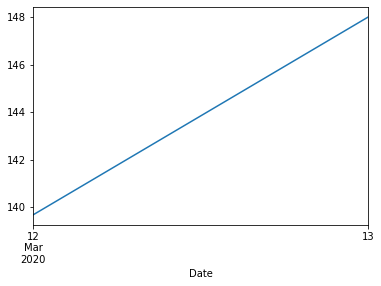

In [46]:
highs.plot()

In [47]:
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-15,124.889615,131.295769,118.043077,124.569231,7.787328e+06


In [48]:
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2020-03-15,124.569231,148.0,90.0,2.024705e+08


In [4]:
Employee

{'first': ['Venkat', 'Ram', 'hari'],
 'last': ['ram', 'Mohan', 'Mishra'],
 'email': ['venk10@gmail.com', 'ramgives@email.com', 'hari9845@email.com']}

In [8]:
filt = (df['last'] == 'ram')
last_df = df.loc[filt]
last_df.head()

,first,last,email
0,Venkat,ram,venk10@gmail.com


In [12]:
last_df.to_csv('C:/Users/ABIRAMI/OneDrive/Documents/2023-job_search/modified.csv')

In [17]:
last_df.to_csv('C:/Users/ABIRAMI/OneDrive/Documents/2023-job_search/modified.tsv', sep='\t')

In [18]:
last_df.to_excel('C:/Users/ABIRAMI/OneDrive/Documents/2023-job_search/modified.xlsx')

In [20]:
test = pd.read_excel('C:/Users/ABIRAMI/OneDrive/Documents/2023-job_search/modified.xlsx')

In [21]:
test.head()

,Unnamed: 0,first,last,email
0,0,Venkat,ram,venk10@gmail.com
